In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests


In [3]:
df = pd.read_csv('updated_plas-5k.csv')
print(df.head)


<bound method NDFrame.head of       Unnamed: 0 pdbid  binding_affinity (kcal/mol)  electrostatic (kcal/mol)  \
0              0  6g3f                     -0.25570                  -0.98408   
1              4  4q3f                     -1.52816                  -5.36862   
2              2  6hxe                     -0.98558                  -8.41628   
3              5  1gyy                     -1.78920                   3.83432   
4              1  5fpd                     -2.61456                  -1.01432   
...          ...   ...                          ...                       ...   
4994        4996  6gvx                    -39.51860                   0.00000   
4995        4995  4qyg                    -37.02860                 -35.92384   
4996        4997  5mob                    -30.31542                   0.00000   
4997        4998  3l9h                    -55.70448                   0.00000   
4998        4999  3dfr                    -51.58218                   0.00000  

### Understanding Correlation in Data Analysis

Correlation analysis is a crucial step in exploring and understanding relationships between different columns (variables) in a dataset. Examining correlations provides valuable insights into the underlying patterns and dependencies within the data. Here are several advantages of finding correlations:

#### 1. **Identifying Relationships:**
   - **Purpose:** Correlation analysis helps to identify and quantify the strength and direction of relationships between variables.
   - **Advantage:** It allows researchers and analysts to understand how changes in one variable relate to changes in another.

#### 2. **Predictive Modeling:**
   - **Purpose:** Correlation helps in selecting relevant features for predictive modeling.
   - **Advantage:** By recognizing which variables are strongly correlated with the target variable, one can build more accurate predictive models.

#### 3. **Multicollinearity Detection:**
   - **Purpose:** Detecting multicollinearity (high correlation between independent variables) is essential in regression analysis.
   - **Advantage:** It helps prevent issues like inflated standard errors and inaccurate coefficient estimates, improving the reliability of regression models.

#### 4. **Feature Selection:**
   - **Purpose:** Correlation analysis aids in feature selection for dimensionality reduction.
   - **Advantage:** By identifying highly correlated variables, redundant information can be eliminated, simplifying models and potentially improving performance.

#### 5. **Data Quality Assessment:**
   - **Purpose:** Correlation can reveal anomalies or errors in the dataset.
   - **Advantage:** Unusual or unexpected correlations may indicate data quality issues, prompting further investigation and data cleaning.

#### 6. **Insights into Interactions:**
   - **Purpose:** Understanding how variables interact is crucial in various fields.
   - **Advantage:** Correlation analysis provides insights into how different factors influence each other, aiding decision-making processes.

#### 7. **Hypothesis Generation:**
   - **Purpose:** Correlation analysis helps generate hypotheses for further research.
   - **Advantage:** Strong correlations may suggest potential causal relationships, guiding researchers toward more in-depth investigations.

#### 8. **Data Exploration and Visualization:**
   - **Purpose:** Correlation matrices can be visualized to provide a comprehensive overview of relationships.
   - **Advantage:** Visualization makes it easier to interpret complex patterns and facilitates communication of findings to stakeholders.

In summary, exploring correlations is fundamental in extracting meaningful information from datasets, enabling informed decision-making, and enhancing the overall quality of data analysis and modeling processes.

<ipython-input-32-0abdaaa329a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.iloc[:,1:].corr()


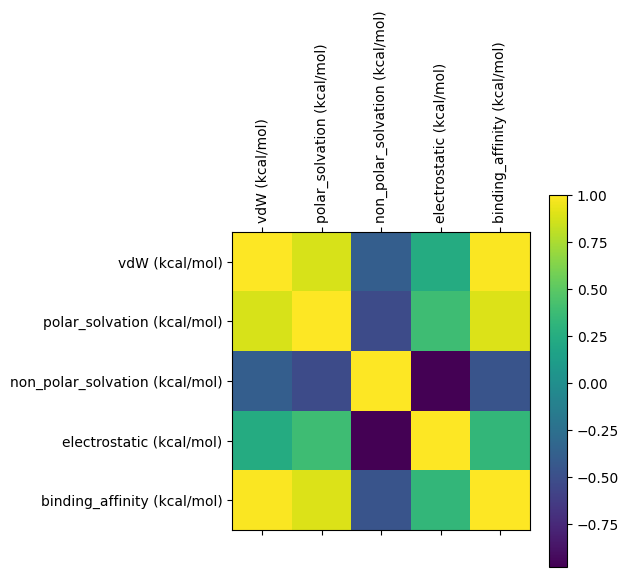

In [32]:
corr = df.iloc[:,1:].corr()
corr = df[['vdW (kcal/mol)', 'polar_solvation (kcal/mol)', 'non_polar_solvation (kcal/mol)', 'electrostatic (kcal/mol)', 'binding_affinity (kcal/mol)']].iloc[1:].corr()
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()

# high positive correlation between binding_affinity, non_polar_solvation and van-der-wall force

A high correlation between "binding_affinity," "non_polar_solvation," and "vdW (van der Waals) force" suggests a strong linear relationship between these three variables in your dataset. Let's break down the implications of this high correlation:

### 1. **Interdependence of Binding Affinity, Non-Polar Solvation, and Van der Waals Force:**
   - The correlation indicates that as one of these variables increases or decreases, there is a consistent pattern of change in the others. In this context, an increase in binding affinity might be associated with an increase in non-polar solvation and van der Waals force, or vice versa.

### 2. **Chemical Interaction Patterns:**
   - A high correlation suggests that the strength of the binding affinity is closely related to the non-polar solvation and van der Waals forces. This could imply that these interactions play a significant role in the overall binding process between molecules.

### 3. **Structural Considerations:**
   - The correlation may point to specific structural features or molecular characteristics that contribute to both binding affinity and the non-polar solvation/van der Waals force. Understanding these shared structural aspects is essential for designing molecules with desired binding properties.

In summary, the high correlation between binding affinity, non-polar solvation, and van der Waals force suggests a strong connection between these molecular properties, offering opportunities for targeted optimization and deeper insights into the binding process.

# High negative correlation between electrostatic and non polar solvation
A high negative correlation between electrostatic and non-polar solvation energies suggests that as one of these variables increases, the other tends to decrease, and vice versa.
It's important to note that the specific reasons for the observed correlation depend on the characteristics of the molecules, the nature of the interactions, and the conditions of the system. Detailed analysis, possibly through molecular simulations or experimental studies, would be required to pinpoint the exact mechanisms driving the negative correlation between electrostatic and non-polar solvation energies in a given context.

<hr>

# Histograms

 Histograms are Important for Data Analysis

#### Data Distribution Visualization:

Histograms provide a visual representation of the distribution of a dataset. This helps analysts and researchers understand the underlying patterns and characteristics of the data.

#### Identifying Central Tendencies:

Central tendencies such as mean, median, and mode can be identified from the shape of the histogram. For example, a symmetric histogram may indicate a normal distribution, while a skewed histogram may suggest a skewed distribution.

#### Outlier Detection:

Outliers, which are data points significantly different from the majority of the data, can be easily identified in a histogram. Outliers may indicate errors in the data collection process or interesting phenomena in the dataset.

#### Understanding Data Spread:

Histograms help in assessing the spread or dispersion of the data. Features such as variability and range can be observed, aiding in understanding the level of consistency or variability within the dataset.

#### Binning for Grouping Data:

Histograms use bins to group data points into intervals. The choice of bin width can impact the visual interpretation of the data. By adjusting bin widths, analysts can highlight specific patterns or trends in the dataset.


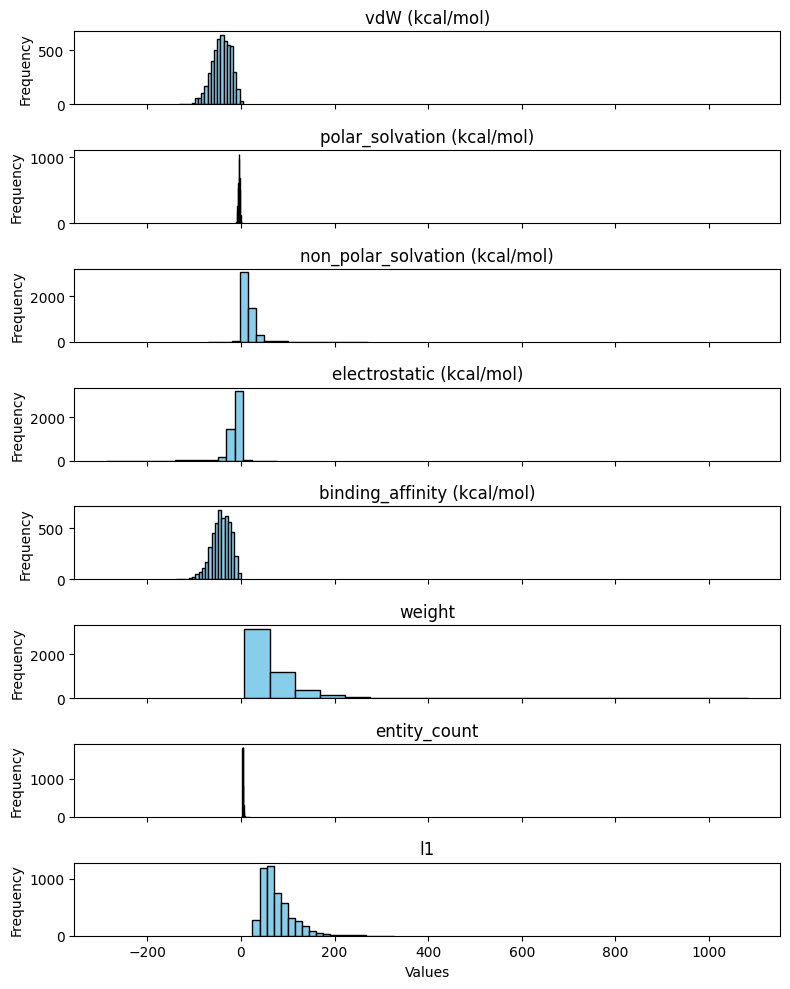

In [52]:
columns_to_plot = ['vdW (kcal/mol)', 'polar_solvation (kcal/mol)', 'non_polar_solvation (kcal/mol)', 'electrostatic (kcal/mol)', 'binding_affinity (kcal/mol)', 'weight', 'entity_count', 'l1']

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 10), sharex=True)

# Plot histograms for each column
for i, column in enumerate(columns_to_plot):
    axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_ylabel('Frequency')

# Set common X-axis label
axes[-1].set_xlabel('Values')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [54]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming your DataFrame is named df
# # If not, replace df with your DataFrame variable


# # Plot individual histograms for each column
# for column in columns_to_plot:
#     plt.figure(figsize=(8, 5))
#     plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
#     plt.title(f'Histogram for {column}')
#     plt.xlabel('Values')
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.show()


# Scatter plots

Scatter plots are essential tools in data analysis for visualizing the relationship between two continuous variables. They provide several advantages that make them a valuable asset in exploring, analyzing, and communicating patterns in data:

##### 1. **Visualizing Relationships:**
   - **Advantage:** Scatter plots offer a clear and intuitive way to visualize the relationship between two variables. Patterns such as linear, nonlinear, or clusters of data points become immediately apparent.

##### 2. **Identification of Trends and Patterns:**
   - **Advantage:** Scatter plots help identify trends and patterns within the data, enabling analysts to make informed observations about the nature and strength of the relationship between variables.

##### 3. **Outlier Detection:**
   - **Advantage:** Outliers, or data points that deviate significantly from the general pattern, are easily spotted on scatter plots. Identifying outliers is crucial for understanding data quality and potential anomalies.

##### 4. **Correlation Assessment:**
   - **Advantage:** Scatter plots are fundamental for assessing the correlation between two variables. The pattern of points can indicate whether the relationship is positive, negative, or neutral.

##### 5. **Comparison of Groups:**
   - **Advantage:** Scatter plots facilitate the comparison of multiple groups or categories. By using different colors or markers, analysts can visually compare how two variables interact across different conditions.


In summary, scatter plots play a crucial role in data analysis by offering a visual representation of relationships, patterns, and outliers in data. Their effectiveness lies in their ability to convey complex information in a simple and accessible format, aiding in both exploratory data analysis and the communication of findings.

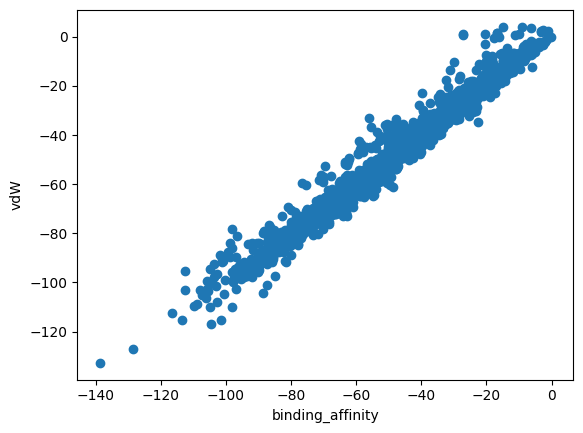

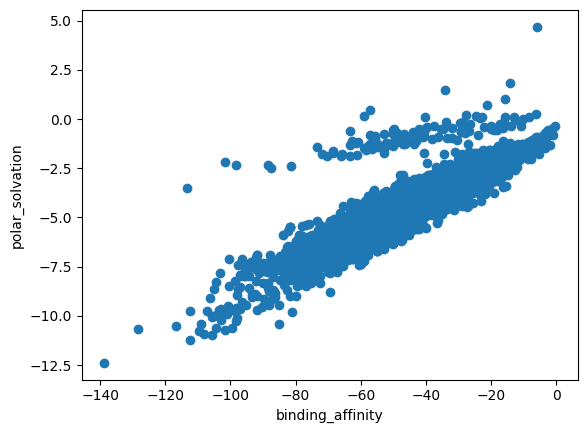

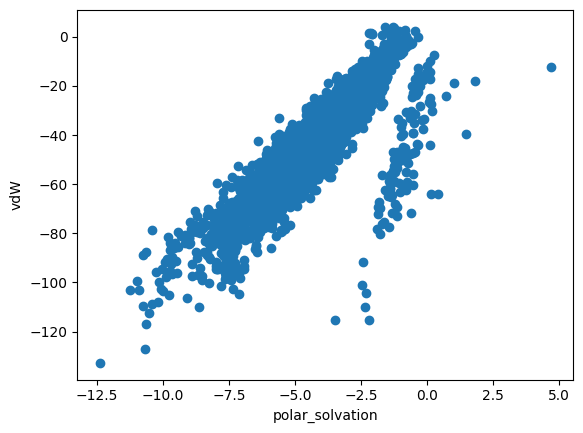

The positive correlation between binding affinity, polar solvation and vanderwall forces can be seen from their scatter plot, as each increases along with other


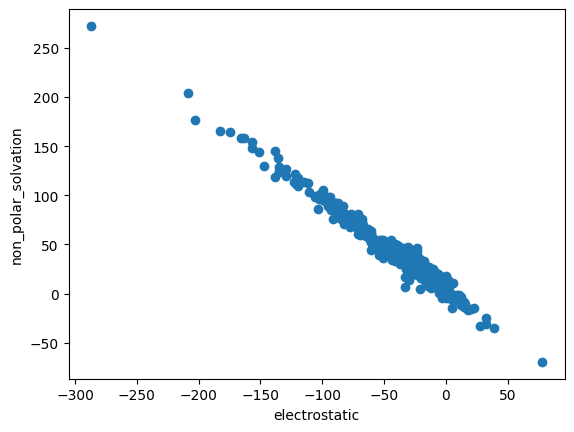

The negative correlation between electrostatic and non-polar solvation  forces can be seen from their scatter plot, as each decrease as the other increases


In [18]:
# Scatter Plots
# plot binding_affinity vs vdW
plt.scatter(df['binding_affinity (kcal/mol)'], df['vdW (kcal/mol)'])
plt.xlabel('binding_affinity')
plt.ylabel('vdW')
plt.show()

# plot binding_affinity vs solvation
plt.scatter(df['binding_affinity (kcal/mol)'], df['polar_solvation (kcal/mol)'])
plt.xlabel('binding_affinity')
plt.ylabel('polar_solvation')
plt.show()

# plot binding_affinity vs solvation
plt.scatter(df['polar_solvation (kcal/mol)'], df['vdW (kcal/mol)'])
plt.xlabel('polar_solvation')
plt.ylabel('vdW')
plt.show()

print("The positive correlation between binding affinity, polar solvation and vanderwall forces can be seen from their scatter plot, as each increases along with other")

# plot electrostatic vs non_polar_solvation
plt.scatter(df['electrostatic (kcal/mol)'], df['non_polar_solvation (kcal/mol)'])
plt.xlabel('electrostatic')
plt.ylabel('non_polar_solvation')
plt.show()

print("The negative correlation between electrostatic and non-polar solvation  forces can be seen from their scatter plot, as each decrease as the other increases")




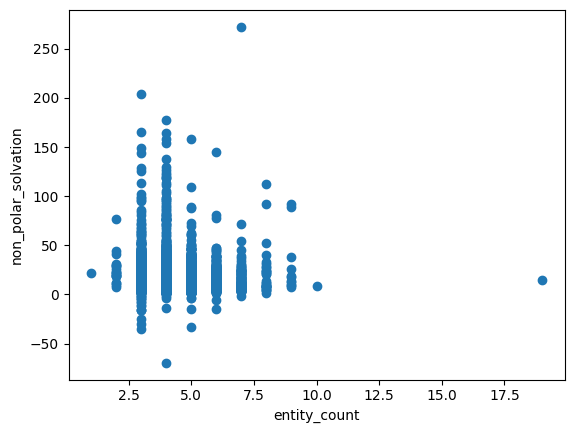

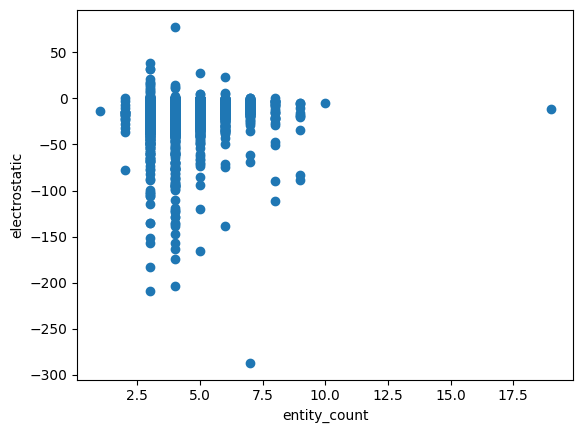

In [36]:


# plot entity_count vs non-polar solvation
plt.scatter(df['entity_count'], df['non_polar_solvation (kcal/mol)'])
plt.xlabel('entity_count')
plt.ylabel('non_polar_solvation')
plt.show()

# plot entity_count vs electrostatic
plt.scatter(df['entity_count'], df['electrostatic (kcal/mol)'])
plt.xlabel('entity_count')
plt.ylabel('electrostatic')
plt.show()




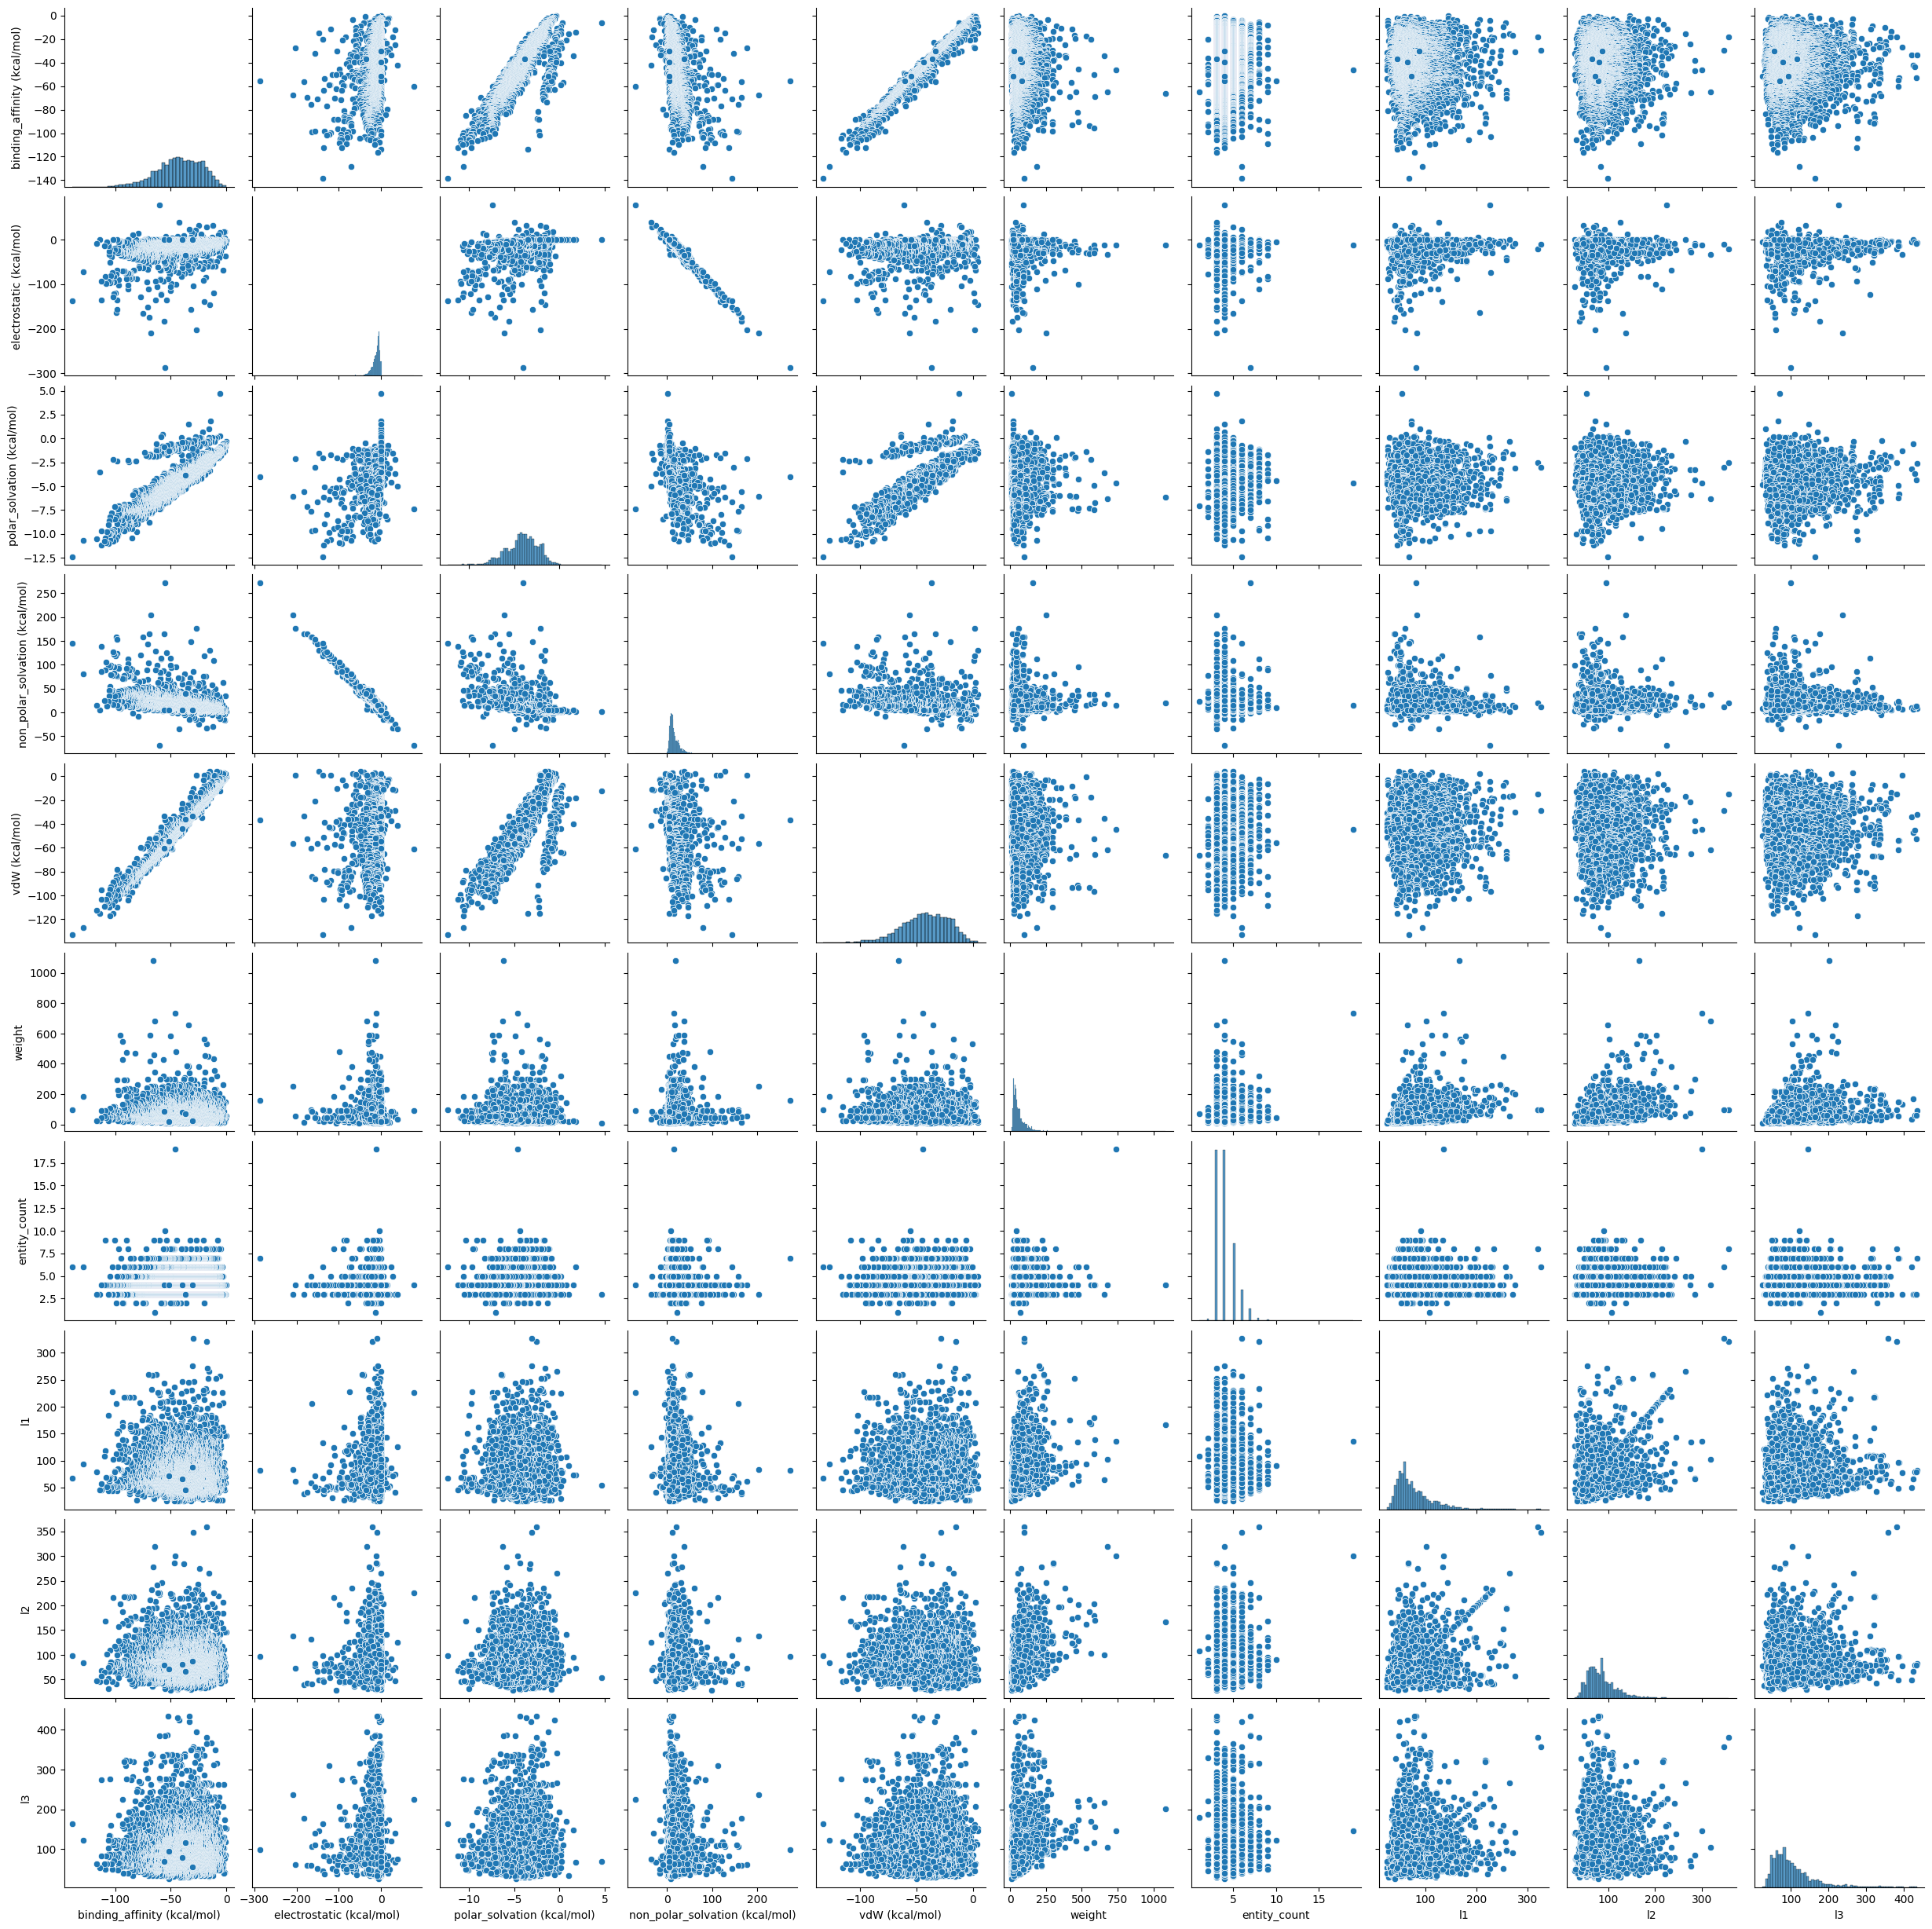

In [37]:
import seaborn as sns
sns.pairplot(df.iloc[:,1:])
plt.show()

#### In the above graphs it can be seen that electrostatic force and non-polar solvation decrease with increase in entity count


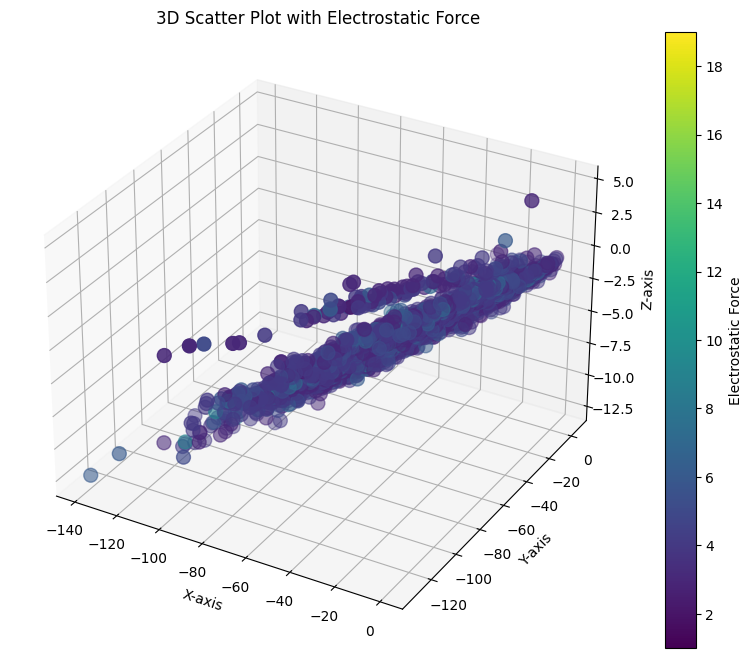

In [47]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on electrostatic force
sc = ax.scatter(df['binding_affinity (kcal/mol)'], df['vdW (kcal/mol)'], df['polar_solvation (kcal/mol)'], c=df['entity_count'], cmap='viridis', s=100)

# Customize the plot
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Scatter Plot with Electrostatic Force')

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Electrostatic Force')

# Show the plot
plt.show()

In [48]:
import plotly.express as px
import pandas as pd


# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df, x='binding_affinity (kcal/mol)', y='vdW (kcal/mol)', z='polar_solvation (kcal/mol)', color='entity_count', size_max=10, opacity=0.7, color_continuous_scale='viridis', title='Interactive 3D Scatter Plot with Entity Count')

# Show the plot
fig.show()